In [1]:
import cv2
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

import os
import redis
import numpy as np
import redisConfig

from GA_keras import GA, ga_main
from SourceLocalisation import SourceLocaliser
from SourceLocalisation_F import SourceLocaliser_F

# start redis server and config the maximum memory available
redisConfig.run()

Using TensorFlow backend.


Configured


In [2]:
# model = keras.models.load_model('alexnet-cifar10_origin.h5')
# new_output = keras.layers.Softmax()(keras.layers.Dense(10)(model.layers[-2].output)) # without specifying activation 
# new_model = keras.models.Model(input=model.input, output=new_output)
# new_model.layers[-2].set_weights(model.layers[-1].get_weights())
# model = new_model

# model = keras.applications.ResNet50()
# new_output = keras.layers.Softmax()(keras.layers.Dense(1000)(model.layers[-2].output)) # without specifying activation 
# new_model = keras.models.Model(input=model.input, output=new_output)
# new_model.layers[-2].set_weights(model.layers[-1].get_weights())
# model = new_model

# model = keras.applications.MobileNetV2()
# new_output = keras.layers.Softmax()(keras.layers.Dense(1000)(model.layers[-2].output)) # without specifying activation 
# new_model = keras.models.Model(input=model.input, output=new_output)
# new_model.layers[-2].set_weights(model.layers[-1].get_weights())
# model = new_model

model = keras.applications.VGG16()
new_output = keras.layers.Softmax()(keras.layers.Dense(1000)(model.layers[-2].output)) # without specifying activation 
new_model = keras.models.Model(input=model.input, output=new_output)
new_model.layers[-2].set_weights(model.layers[-1].get_weights())
model = new_model

/data/yylaiai/anaconda3/envs/audee_test/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("so...)`


In [3]:
# load inputs
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# expand cifar10 images from 32x32 to 224x224
x_test_224 = np.array([cv2.resize(i, (224, 224)) for i in x_test])
print(x_test_224.shape)

(10000, 224, 224, 3)


In [4]:
mut_level = 'i+w'
model = model
x = x_test_224[0]/255
input_scale = 255 # image scale
init_noise = 0.01 # scale of Cauchy noise added in initialization
r1 = 0.5 # crossover rate
r2 = 0.3 # mutation rate
r3 = 10 # mutation scale (larger scale can trigger NaN inconsistency easier, smaller scale can increase layer distance easier)
m = 3 # top m chromosomes selected
n = 6 # population size
layer_idx = -2 # index of layer used in calculation of fitness values
db_flag = 1
maxIter = 10
dynamicWeightMutDecay = 2

r = redis.Redis(db=db_flag)
r.flushdb()

fit = ['inc', ['tensorflow', 'theano']]

In [5]:
ga = GA(fit, mut_level, model, x, input_scale, db_flag)
ga.initPopulation(init_noise, n)

array([[ 0.61960784,  0.43921569,  0.19215686, ...,  0.11728761,
        -0.04488204,  0.11856291],
       [ 0.61948091,  0.43813328,  0.19788048, ...,  0.11426687,
        -0.04704201,  0.41968688],
       [ 0.63515096,  0.42495053,  3.23244238, ...,  0.11292991,
        -0.03342647,  0.11577896],
       [ 0.61493745,  0.43976847,  0.1889879 , ...,  0.09947017,
        -0.05650943,  0.12297793],
       [ 0.61400359,  0.43461732,  0.18814908, ...,  0.12086354,
        -0.05023218,  0.11440835],
       [ 0.61560089,  0.01937915,  0.17555773, ...,  0.11622621,
        -0.03572509,  0.11530686]])

In [6]:
ga = ga_main(fit, mut_level, model, x, input_scale, init_noise, r1, r2, r3, m, n, layer_idx, db_flag, maxIter, dynamicWeightMutDecay, ga)

Continuing from the previous populations...

Running at iteration 1:
Average fitness value: 2.2831054714818795e-07
Time taken: 234.04635524749756

Running at iteration 2:
Average fitness value: nan
Time taken: 250.55269765853882

Running at iteration 3:
Average fitness value: nan
Time taken: 251.9981336593628

Running at iteration 4:
Average fitness value: nan
Time taken: 263.0788972377777

Running at iteration 5:
Average fitness value: nan
Time taken: 278.85234332084656

Running at iteration 6:


KeyboardInterrupt: 

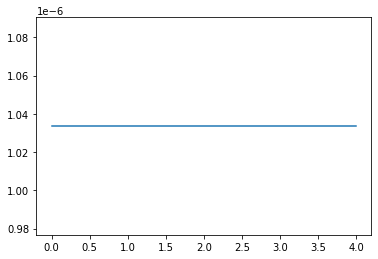

In [7]:
plt.plot(np.max(np.nan_to_num(ga.fit_hist, -1), axis=1))

In [8]:
ga.fit_hist

[array([5.82002103e-08, 1.70469284e-08, 9.60635953e-08, 1.56804919e-07,
        1.03363395e-06, 8.11368227e-09]),
 array([9.60635953e-08, 1.56804919e-07, 1.03363395e-06,            nan,
                   nan,            nan]),
 array([9.60635953e-08, 1.56804919e-07, 1.03363395e-06,            nan,
                   nan,            nan]),
 array([9.60635953e-08, 1.56804919e-07, 1.03363395e-06,            nan,
                   nan,            nan]),
 array([9.60635953e-08, 1.56804919e-07, 1.03363395e-06,            nan,
                   nan,            nan])]

In [9]:
ga.layers_r3

[[150528, 150528, 10],
 [150528, 152320, 10],
 [152320, 189248, 10],
 [189248, 189248, 10],
 [189248, 263104, 10],
 [263104, 410688, 10],
 [410688, 410688, 10],
 [410688, 705856, 10],
 [705856, 1295936, 10],
 [1295936, 1886016, 10],
 [1886016, 1886016, 10],
 [1886016, 3066176, 10],
 [3066176, 5425984, 0.3125],
 [5425984, 7785792, 0.078125],
 [7785792, 7785792, 10],
 [7785792, 10145600, 10],
 [10145600, 12505408, 10],
 [12505408, 14865216, 10],
 [14865216, 14865216, 10],
 [14865216, 14865216, 10],
 [14865216, 117629760, 10],
 [117629760, 134411072, 10],
 [134411072, 138508072, 10],
 [138508072, 138508072, 10]]

## Inconsistency Localisation

In [10]:
SL = SourceLocaliser_F(ga, 'vgg-16', 1)

In [11]:
L, UF = SL.localiseNan()

In [12]:
print(L)
print(UF)

[['theano', 18], ['theano', 14], ['theano', 18], ['theano', 14], ['theano', 18], ['theano', 14], ['theano', 18], ['theano', 14], ['theano', 18], ['theano', 14], ['theano', 18], ['theano', 14], ['theano', 18], ['theano', 14], ['theano', 18], ['theano', 14], ['theano', 18], ['theano', 14], ['theano', 18], ['theano', 14], ['theano', 18], ['theano', 14], ['theano', 18], ['theano', 14]]
[[0, 'theano', 19], [0, 'theano', 12], [1, 'theano', 19], [1, 'theano', 12], [2, 'theano', 19], [2, 'theano', 12], [3, 'theano', 19], [3, 'theano', 12], [4, 'theano', 19], [5, 'theano', 19], [5, 'theano', 12], [6, 'theano', 19], [7, 'theano', 19], [8, 'theano', 19], [9, 'theano', 19], [10, 'theano', 19], [11, 'theano', 19]]


In [23]:
def formatP(ga, idx):
    formatted_c = ga.formatPopulations(ga.P)[idx]
    if ga.mut_level == 'i':
        x = formatted_c
    elif ga.mut_level == 'w':
        x = ga.input
        ga.model.set_weights(formatted_c)
    elif ga.mut_level == 'i+w':
        x = formatted_c[0]
        ga.model.set_weights(formatted_c[1])

    return x, ga.model

In [24]:
x, m = formatP(ga, 2)

In [31]:
SL = SourceLocaliser(m, ['tensorflow', 'theano'], x, [], 1)
SL.prepare()

In [32]:
SL.compute_all_layers_dist()

[0.0,
 1.357734317378122e-05,
 0.00047295738239677584,
 0.0010168206478868211,
 0.01482031539994843,
 1.0063281156578843,
 2.6744092045998085,
 66.31686961894133,
 3225.6023596938776,
 154571.41836734695,
 371779.2653061224,
 21067577.469387755,
 4258819845.2244897,
 312320779744.6531,
 678678703877.2245,
 111564799521185.95,
 1.1553839983362048e+16,
 1.215817788250043e+18,
 2.975246870631817e+18,
 2.975246870631817e+18,
 3.32116603440549e+21,
 3.441088065427097e+23,
 9.423518206551647e+25,
 0.0]

In [47]:
print('Change rate between layers:\n')
for i in range(2,len(model.layers)):
    print('{:<5} {:<30} {}'.format(i, model.layers[i].__class__.__name__, SL.compute_dists_change(i)))

Change rate between layers:

2     Conv2D                         33.58693522464239
3     MaxPooling2D                   1.1496771548824094
4     Conv2D                         13.573816974555008
5     Conv2D                         66.90148511366192
6     MaxPooling2D                   1.6575914925046802
7     Conv2D                         23.79682881931373
8     Conv2D                         47.63924327949071
9     Conv2D                         46.920171529550956
10    MaxPooling2D                   1.4052264592825907
11    Conv2D                         55.6668973645832
12    Conv2D                         201.150430034623
13    Conv2D                         72.33505315911998
14    MaxPooling2D                   1.1730180887486832
15    Conv2D                         163.38529584592425
16    Conv2D                         102.56169717463611
17    Conv2D                         104.23062375806354
18    MaxPooling2D                   1.4471157597670659
19    Flatten               